In [110]:
import numpy as np
import math
import timeit

In [111]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
         "text.color" : "w"}
plt.rcParams.update(params) #dark theme
import scipy.stats
import scipy

Zadanie 1. (1 punkt)<br>
a) Wygeneruj 10 000 liczb z rozkładu jednostajnego na odcinku [-1, 1]. Sporządź ich histogram z
100 przedziałami. Porównaj histogram z wykresem funkcji gęstości. Powtórz obliczenia dla
100 000 liczb.

In [112]:
def zad1a(n):
    a1 = np.random.uniform(-1, 1, n)
    x, bins, patches = plt.hist(a1, bins=100, density=1) #histogram
    #+ wykres funkcja gestosci - linia rozkladu
    #plt.plot(bins, bins/2)
    plt.axhline(y=0.5, color='r', linestyle='-')

    plt.show()
    

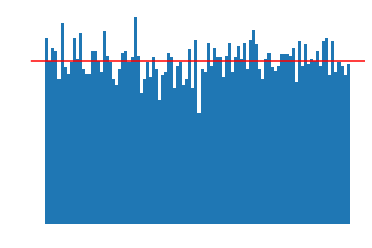

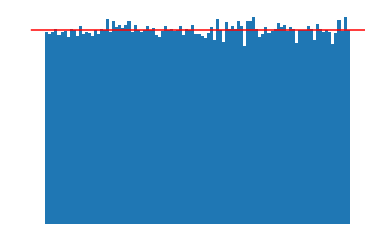

In [113]:
zad1a(10000)
zad1a(100000)

b) Wygeneruj 10 000 liczb z rozkładu normalnego o średniej 5 i odchyleniu standardowym 3.
Sporządź ich histogram z 100 przedziałami. Porównaj histogram z wykresem funkcji gęstości.
Powtórz obliczenia dla 100 000 liczb.

In [114]:
def zad1b(n):
    mean = 5 ; std = 3
    b = np.random.normal(mean,std,n)
    x, bins, patches = plt.hist(b, bins=100, density=1) #histogram
    x_all = np.arange(-5,15,0.001)
    y = scipy.stats.norm.pdf(x_all, mean, std)
    plt.plot(x_all,y, color='red', linewidth=2)
    plt.show()

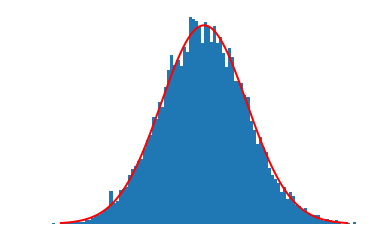

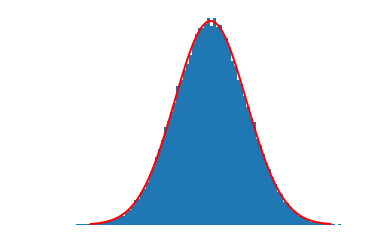

In [115]:
zad1b(10000)
zad1b(100000)

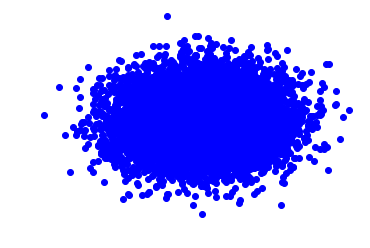

In [116]:
#do skonczenia C i D

c1 = np.empty([2,10000])
c1[0][:] = np.random.normal(5,3,(10000))
c1[1][:] = np.random.normal(5,3,(10000))
plt.plot(c1[0][:],c1[1][:], 'bo')
plt.show()


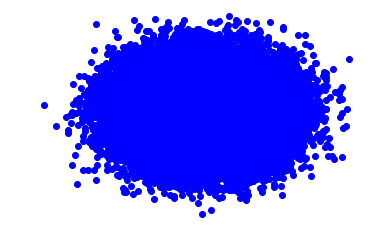

In [117]:
c2 = np.empty([2,100000])
c2[0][:] = np.random.normal(5,3,(100000))
c2[1][:] = np.random.normal(5,3,(100000))
plt.plot(c2[0][:],c2[1][:], 'bo')
plt.show()

In [118]:
s = 0; s2 = 0;
for i in range(100000):
    if(c2[0][i] < c2[1][i]):
        s+=1
for i in range(10000):
    if(c1[0][i] < c1[1][i]):
        s2+=1
s/=100000
s2/=10000
print(s, s2)
#policzenie P analitycznie

0.49783 0.4954


c) Wygeneruj 10 000 punktów (x, y), których współrzędna x ma rozkład normalny N(2, 5), zaś
współrzędna y ma rozkład normalny N(3, 1). Sporządź wykres tych punktów. Porównaj go z
wykresem funkcji gęstości. Powtórz obliczenia dla 100 000 punktów.

In [155]:
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm

def zad1c(n):
    sigma_x, sigma_y = 5, 1 #odchylenia std
    mean = [2, 3] #lista srednich
    cov = np.array([[sigma_x ** 2, 0], [0, sigma_y ** 2]]) #macierz kowariancji
    bins_no = 100
    X = np.random.multivariate_normal(mean, cov, n)#macierz wspolrzednych

   # print(X.shape)
    plt.scatter(X[:,0], X[:,1])
    plt.show()
    #histogram
    h, xedges, yedges, image = plt.hist2d(X[:,0], X[:,1], bins=(bins_no, bins_no), density=True)
    #plt.title('2d histogram') #generowanie histogramu

    xedges, yedges = xedges[:-1], yedges[:-1]
    xedges, yedges = np.meshgrid(xedges, yedges)
    
    M = scipy.stats.multivariate_normal( mean, cov)
    pos = np.empty(xedges.shape + (2,))
    pos[:, :, 0] = xedges
    pos[:, :, 1] = yedges
    plt.contour(xedges, yedges, M.pdf(pos)) #okregi do rozkladu
    plt.show()    
    
    #wykres w 3d
    fig = plt.figure()
    ax = fig.gca(projection='3d') #current axes
    ax.plot_surface(xedges, yedges, h, cmap=cm.viridis)#mapa kolorow default
    #powierzchnia
    cset = ax.contourf(xedges, yedges, h, offset=-0.20, cmap=cm.viridis)
    #powierzchnia
    
    

    ax.set_zlim(-0.15,0.2) #limity
    plt.show()
    
    g = M.pdf(pos)
    plt.imshow(g)#gestosc
    plt.show()

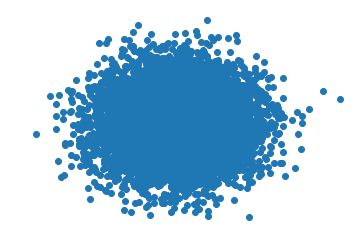

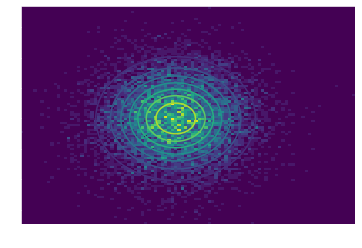

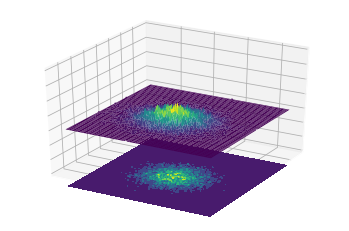

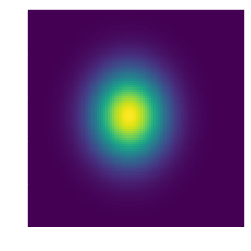

In [154]:
zad1c(10000)


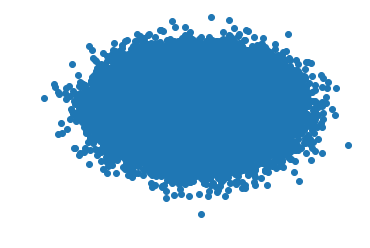

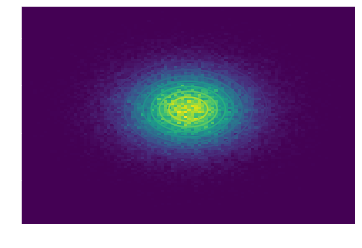

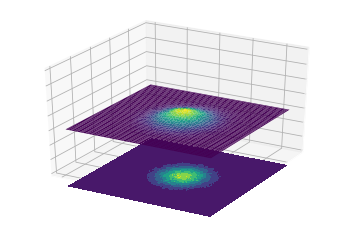

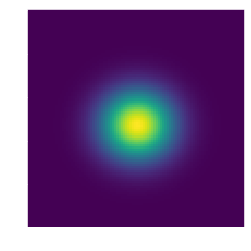

In [150]:
zad1c(100000)

d) Używając danych wygenerowanych w poprzednim punkcie oszacuj prawdopodobieństwo, że
X < Y dla zmiennych losowych X z rozkładem normalnym N(2, 5) i Y z rozkładem normalnym N(3,
1). Uzyskaną wartość porównaj z dokładnym prawdopodobieństwem takiego zdarzenia obliczonym
w oparciu o rachunek prawdopodobieństwa i statystykę.

In [122]:

def compar(n):
    sigmax, sigmay = 5, 1 #odchylenia std
    mean = [2, 3] #lista srednich
    cov = np.array([[sigma_x ** 2, 0], [0, sigma_y ** 2]]) #macierz kowariancji
    X = np.random.multivariate_normal(mean, cov, n)
    print(np.sum(X[:,0]<X[:,1])/n)

compar(10000)
compar(100000)
compar(1000000)
u = scipy.stats.norm.cdf(0, -1, math.sqrt(sigmax**2 + sigmay**2))#policzenie wartosci z bibl 
print(u)

0.57
0.57545
0.577489
0.57774036626353
